In [27]:
import pandas as pd
import numpy as np

from sklearn import preprocessing
from sklearn.model_selection import train_test_split

np.random.seed(42)

# load data

In [28]:
df1_ori=pd.read_csv('BBB_planA_weekly.csv', low_memory=False)

In [29]:
df1_ori

,final_result,T0,T1,T2,T3,T4,T5,T6,T7,T8,...,T31,T32,T33,T34,T35,T36,T37,T38,T39,id1
0,1,13.0,0.0,0.0,38.0,0.0,0.0,0.0,48.0,40.0,...,0.0,0.0,0.0,83.0,33.0,0.0,0.0,1.0,0.0,0
1,1,7.0,25.0,6.0,1.0,10.0,16.0,4.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,0,71.0,96.0,3.0,117.0,83.0,218.0,303.0,1.0,18.0,...,0.0,0.0,0.0,59.0,3.0,3.0,5.0,4.0,0.0,2
3,1,117.0,21.0,36.0,3.0,1.0,24.0,120.0,0.0,50.0,...,17.0,67.0,0.0,54.0,0.0,0.0,0.0,0.0,0.0,3
4,0,2.0,1.0,0.0,8.0,0.0,0.0,4.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5336,1,64.0,28.0,29.0,21.0,9.0,25.0,0.0,42.0,3.0,...,1.0,8.0,78.0,0.0,2.0,0.0,0.0,0.0,0.0,5336
5337,0,32.0,14.0,7.0,38.0,15.0,84.0,43.0,32.0,0.0,...,0.0,0.0,56.0,0.0,0.0,0.0,0.0,0.0,0.0,5337
5338,1,562.0,272.0,62.0,149.0,73.0,265.0,142.0,107.0,279.0,...,44.0,48.0,103.0,4.0,7.0,0.0,0.0,0.0,0.0,5338
5339,0,0.0,14.0,0.0,13.0,0.0,0.0,29.0,0.0,0.0,...,31.0,11.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,5339


In [30]:
df1_sorted=df1_ori.sort_values(by=['id1'])
df1_sorted.head(10)

,final_result,T0,T1,T2,T3,T4,T5,T6,T7,T8,...,T31,T32,T33,T34,T35,T36,T37,T38,T39,id1
0,1,13.0,0.0,0.0,38.0,0.0,0.0,0.0,48.0,40.0,...,0.0,0.0,0.0,83.0,33.0,0.0,0.0,1.0,0.0,0
1,1,7.0,25.0,6.0,1.0,10.0,16.0,4.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,0,71.0,96.0,3.0,117.0,83.0,218.0,303.0,1.0,18.0,...,0.0,0.0,0.0,59.0,3.0,3.0,5.0,4.0,0.0,2
3,1,117.0,21.0,36.0,3.0,1.0,24.0,120.0,0.0,50.0,...,17.0,67.0,0.0,54.0,0.0,0.0,0.0,0.0,0.0,3
4,0,2.0,1.0,0.0,8.0,0.0,0.0,4.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
5,1,52.0,60.0,32.0,7.0,41.0,11.0,53.0,19.0,11.0,...,11.0,3.0,7.0,6.0,0.0,0.0,0.0,0.0,0.0,5
6,1,27.0,44.0,34.0,26.0,26.0,26.0,13.0,16.0,32.0,...,6.0,0.0,0.0,0.0,66.0,0.0,0.0,0.0,0.0,6
7,1,0.0,0.0,20.0,58.0,0.0,16.0,0.0,132.0,0.0,...,27.0,22.0,29.0,0.0,0.0,0.0,0.0,0.0,0.0,7
8,1,169.0,130.0,138.0,193.0,154.0,54.0,155.0,103.0,292.0,...,12.0,0.0,0.0,7.0,50.0,10.0,0.0,8.0,0.0,8
9,0,0.0,0.0,8.0,0.0,0.0,3.0,0.0,0.0,24.0,...,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,9


In [31]:
df1_sorted.info() # final_result  is an object

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5341 entries, 0 to 5340
Data columns (total 42 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   final_result  5341 non-null   int64  
 1   T0            5341 non-null   float64
 2   T1            5341 non-null   float64
 3   T2            5341 non-null   float64
 4   T3            5341 non-null   float64
 5   T4            5341 non-null   float64
 6   T5            5341 non-null   float64
 7   T6            5341 non-null   float64
 8   T7            5341 non-null   float64
 9   T8            5341 non-null   float64
 10  T9            5341 non-null   float64
 11  T10           5341 non-null   float64
 12  T11           5341 non-null   float64
 13  T12           5341 non-null   float64
 14  T13           5341 non-null   float64
 15  T14           5341 non-null   float64
 16  T15           5341 non-null   float64
 17  T16           5341 non-null   float64
 18  T17           5341 non-null 

# prepare dataset for y

In [32]:
y = df1_sorted['final_result']

In [33]:
print(y) # df_label is a collection of t: 12 activities * 5341 students = 64,092 rows

0       1
1       1
2       0
3       1
4       0
       ..
5336    1
5337    0
5338    1
5339    0
5340    1
Name: final_result, Length: 5341, dtype: int64


In [34]:
print(type(y))

<class 'pandas.core.series.Series'>


# prepare dataset for X

In [35]:
X=df1_sorted.drop(['final_result','id1'], axis=1)

In [36]:
X.head()

,T0,T1,T2,T3,T4,T5,T6,T7,T8,T9,...,T30,T31,T32,T33,T34,T35,T36,T37,T38,T39
0,13.0,0.0,0.0,38.0,0.0,0.0,0.0,48.0,40.0,0.0,...,149.0,0.0,0.0,0.0,83.0,33.0,0.0,0.0,1.0,0.0
1,7.0,25.0,6.0,1.0,10.0,16.0,4.0,2.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,71.0,96.0,3.0,117.0,83.0,218.0,303.0,1.0,18.0,23.0,...,35.0,0.0,0.0,0.0,59.0,3.0,3.0,5.0,4.0,0.0
3,117.0,21.0,36.0,3.0,1.0,24.0,120.0,0.0,50.0,54.0,...,19.0,17.0,67.0,0.0,54.0,0.0,0.0,0.0,0.0,0.0
4,2.0,1.0,0.0,8.0,0.0,0.0,4.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [37]:
X.shape

(5341, 40)

# create X and y (7:3)

5341 students * 0.7 = 3738 students

In [38]:
X_train, X_test, y_train, y_test = train_test_split(
         X, y, test_size=0.3, random_state=42, stratify=y)

In [39]:
print("xtrain:",X_train.shape)
print("ytrain:",y_train.shape)
print("xtest:",X_test.shape)
print("ytest:",y_test.shape)


xtrain: (3738, 40)
ytrain: (3738,)
xtest: (1603, 40)
ytest: (1603,)


# reshape X and y

In [40]:
print(X_train.shape[0])
print(X_train.shape[1])
print(X_test.shape[0])
print(X_test.shape[1])

3738
40
1603
40


In [41]:
X_train_reshaped=X_train.values.reshape((X_train.shape[0], X_train.shape[1] ))
X_test_reshaped=X_test.values.reshape((X_test.shape[0],X_test.shape[1]))

y_train_reshaped=y_train.values.reshape((y_train.shape[0],1 ))
y_test_reshaped=y_test.values.reshape((y_test.shape[0],1))

In [42]:
print("xtrain_reshaped:", X_train_reshaped.shape)
print("xtrain_reshaped:", type(X_train_reshaped))
print("xtest_reshaped:", X_test_reshaped.shape)
print("xtest_reshaped:", type(X_test_reshaped))


xtrain_reshaped: (3738, 40)
xtrain_reshaped: <class 'numpy.ndarray'>
xtest_reshaped: (1603, 40)
xtest_reshaped: <class 'numpy.ndarray'>


In [43]:
print("ytrain_reshaped:", y_train_reshaped.shape)
print("ytrain_reshaped:", type(y_train_reshaped))
print("ytest_reshaped:", y_test_reshaped.shape)
print("ytest_reshaped:", type(y_test_reshaped))

ytrain_reshaped: (3738, 1)
ytrain_reshaped: <class 'numpy.ndarray'>
ytest_reshaped: (1603, 1)
ytest_reshaped: <class 'numpy.ndarray'>


# MinMaxScaler

In [44]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
X_train_scaled = min_max_scaler.fit_transform(X_train_reshaped)
X_test_scaled = min_max_scaler.fit_transform(X_test_reshaped)

# reshape X again 

In [45]:
X_train_reshaped2=X_train_scaled.reshape((X_train_scaled.shape[0],40,1))
X_test_reshaped2=X_test_scaled.reshape((X_test_scaled.shape[0],40,1))

In [46]:
print("xtrain_reshaped2:", X_train_reshaped2.shape)
print("xtrain_reshaped2:", type(X_train_reshaped2))
print("xtest_reshaped2:", X_test_reshaped2.shape)
print("xtest_reshaped2:", type(X_test_reshaped2))

xtrain_reshaped2: (3738, 40, 1)
xtrain_reshaped2: <class 'numpy.ndarray'>
xtest_reshaped2: (1603, 40, 1)
xtest_reshaped2: <class 'numpy.ndarray'>


# the final X and y for modelling

In [47]:
X_train1 = X_train_reshaped2
X_test1 = X_test_reshaped2
y_train1 = y_train_reshaped
y_test1 = y_test_reshaped

# build LSTM model

In [48]:
from keras.models import Sequential
from keras.layers import Dense,LSTM, Masking, Dropout
from keras.preprocessing import sequence
import tensorflow as tf
from tensorflow import keras

tf.random.set_seed(42)

In [54]:
print(X_train1.shape)
print(X_test1.shape)
print(y_train1.shape)
print(y_test1.shape)

(3738, 40, 1)
(1603, 40, 1)
(3738, 1)
(1603, 1)


In [84]:
batch_size = 128

In [109]:
## 
    
lr=0.0001
epochs = 100

model = Sequential()
model.add(LSTM(80, dropout=0.2, input_shape=(X_train1.shape[1], X_train1.shape[2]),return_sequences=True))
model.add(LSTM(50, dropout=0.2, return_sequences=False))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(learning_rate=lr),
              metrics=['accuracy'])

## loss: 0.3084 - accuracy: 0.8840 (lr=0.0001, epochs = 100)

model = Sequential()
model.add(LSTM(80, dropout=0.2, input_shape=(X_train1.shape[1], X_train1.shape[2]),return_sequences=True))
model.add(LSTM(50, dropout=0.2, return_sequences=False))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(learning_rate=lr),
              metrics=['accuracy'])

## loss: 0.2946 - accuracy: 0.8921 (lr=0.0001, epochs = 150)

model = Sequential()
model.add(LSTM(80, dropout=0.2, input_shape=(X_train1.shape[1], X_train1.shape[2]),return_sequences=True))
model.add(LSTM(50, dropout=0.2, return_sequences=False))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(learning_rate=lr),
              metrics=['accuracy'])

##  loss: 0.2932 - accuracy: 0.8902 (lr=0.001, epochs = 150)

model = Sequential()
model.add(LSTM(80, dropout=0.2, input_shape=(X_train1.shape[1], X_train1.shape[2]),return_sequences=True))
model.add(LSTM(50, dropout=0.2, return_sequences=False))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(learning_rate=lr),
              metrics=['accuracy'])

## loss: 0.2922 - accuracy: 0.8946 (lr=0.001, epochs = 100) --> best

model = Sequential()
model.add(LSTM(80, dropout=0.2, input_shape=(X_train1.shape[1], X_train1.shape[2]),return_sequences=True))
model.add(LSTM(50, dropout=0.2, return_sequences=False))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(learning_rate=lr),
              metrics=['accuracy'])

## loss: 0.2939 - accuracy: 0.8927 (lr=0.001, epochs = 60)

model = Sequential()
model.add(LSTM(80, dropout=0.2, input_shape=(X_train1.shape[1], X_train1.shape[2]),return_sequences=True))
model.add(LSTM(50, dropout=0.2, return_sequences=False))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(learning_rate=lr),
              metrics=['accuracy'])

In [110]:
print(model.summary())

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_20 (LSTM)              (None, 40, 80)            26240     
                                                                 
 lstm_21 (LSTM)              (None, 50)                26200     
                                                                 
 dense_10 (Dense)            (None, 1)                 51        
                                                                 
Total params: 52,491
Trainable params: 52,491
Non-trainable params: 0
_________________________________________________________________
None


In [111]:
history_model = model.fit(X_train1, y_train1, validation_data=(X_test1, y_test1), epochs=epochs, batch_size=batch_size)

Epoch 1/100
30/30 [==============================] - 5s 85ms/step - loss: 0.6884 - accuracy: 0.6327 - val_loss: 0.6786 - val_accuracy: 0.7024
Epoch 2/100
30/30 [==============================] - 2s 65ms/step - loss: 0.6639 - accuracy: 0.7025 - val_loss: 0.6332 - val_accuracy: 0.7024
Epoch 3/100
30/30 [==============================] - 2s 63ms/step - loss: 0.5984 - accuracy: 0.7025 - val_loss: 0.5712 - val_accuracy: 0.7024
Epoch 4/100
30/30 [==============================] - 2s 65ms/step - loss: 0.5720 - accuracy: 0.7025 - val_loss: 0.5516 - val_accuracy: 0.7024
Epoch 5/100
30/30 [==============================] - 2s 65ms/step - loss: 0.5551 - accuracy: 0.7025 - val_loss: 0.5316 - val_accuracy: 0.7024
Epoch 6/100
30/30 [==============================] - 2s 65ms/step - loss: 0.5354 - accuracy: 0.7025 - val_loss: 0.5142 - val_accuracy: 0.7024
Epoch 7/100
30/30 [==============================] - 2s 65ms/step - loss: 0.5260 - accuracy: 0.7025 - val_loss: 0.5192 - val_accuracy: 0.7024
Epoch 

30/30 [==============================] - 2s 65ms/step - loss: 0.3506 - accuracy: 0.8612 - val_loss: 0.3136 - val_accuracy: 0.8802
Epoch 59/100
30/30 [==============================] - 2s 65ms/step - loss: 0.3475 - accuracy: 0.8644 - val_loss: 0.3102 - val_accuracy: 0.8821
Epoch 60/100
30/30 [==============================] - 2s 66ms/step - loss: 0.3512 - accuracy: 0.8633 - val_loss: 0.3122 - val_accuracy: 0.8790
Epoch 61/100
30/30 [==============================] - 2s 70ms/step - loss: 0.3476 - accuracy: 0.8638 - val_loss: 0.3153 - val_accuracy: 0.8790
Epoch 62/100
30/30 [==============================] - 2s 67ms/step - loss: 0.3462 - accuracy: 0.8649 - val_loss: 0.3339 - val_accuracy: 0.8690
Epoch 63/100
30/30 [==============================] - 2s 65ms/step - loss: 0.3568 - accuracy: 0.8625 - val_loss: 0.3094 - val_accuracy: 0.8815
Epoch 64/100
30/30 [==============================] - 2s 65ms/step - loss: 0.3415 - accuracy: 0.8662 - val_loss: 0.3184 - val_accuracy: 0.8759
Epoch 65/100

In [112]:
history_model.params

{'verbose': 1, 'epochs': 100, 'steps': 30}

In [113]:
model.evaluate(X_test1, y_test1)

51/51 [==============================] - 0s 9ms/step - loss: 0.3084 - accuracy: 0.8840


[0.30836221575737, 0.8839675784111023]

# plot MLP learning process

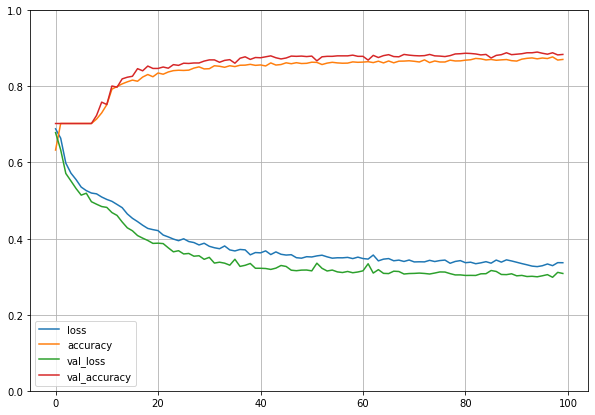

In [114]:
import matplotlib.pyplot as plt

pd.DataFrame(history_model.history).plot(figsize=(10, 7))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

## loss: 0.5963 - accuracy: 0.7168 (lr=0.1)

model = Sequential()
model.add(LSTM(80, dropout=0.4, input_shape=(rows, cols),return_sequences=True))
model.add(LSTM(50, dropout=0.4, return_sequences=False))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(learning_rate=lr),
              metrics=['accuracy'])

## loss: 0.2925 - accuracy: 0.8852 (lr=0.01)

model = Sequential()
model.add(LSTM(80, dropout=0.4, input_shape=(rows, cols),return_sequences=True))
model.add(LSTM(50, dropout=0.4, return_sequences=False))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(learning_rate=lr),
              metrics=['accuracy'])

## loss: 0.3015 - accuracy: 0.8858 (lr=0.001) --> best

model = Sequential()
model.add(LSTM(80, dropout=0.4, input_shape=(rows, cols),return_sequences=True))
model.add(LSTM(50, dropout=0.4, return_sequences=False))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(learning_rate=lr),
              metrics=['accuracy'])

## loss: 0.3369 - accuracy: 0.8646 (lr=0.0001)

model = Sequential()
model.add(LSTM(80, dropout=0.4, input_shape=(rows, cols),return_sequences=True))
model.add(LSTM(50, dropout=0.4, return_sequences=False))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(learning_rate=lr),
              metrics=['accuracy'])